# Stage 1- LF

In [17]:
import numpy as np
import datetime as dt
import numpy as np
import geopandas as gpd
import datetime as dt
import csv
import matplotlib.colors as clrs
import matplotlib.pyplot as plt

In [18]:
Data=np.load('PortfolioOptimizationWindKiteStage1LF.npz',allow_pickle=True)

WindEnergy=Data['WindEnergy']
WindLatLong=Data['WindLatLong']
AnnualizedCostWind=Data['AnnualizedCostWind']
KiteEnergy=Data['KiteEnergy']
KiteLatLong=Data['KiteLatLong']
AnnualizedCostKite=Data['AnnualizedCostKite']
AnnualizedCostTransmission=Data['AnnualizedCostTransmission']
TransLatLong=Data['TransLatLong']
MaxPowerTransmission=Data['MaxPowerTransmission']
Save_LCOE_Achieved=Data['Save_LCOE_Achieved']
SaveYWind=Data['SaveYWind']
SaveYKite=Data['SaveYKite']
SaveYTrans=Data['SaveYTrans']
SaveCurtail=Data['SaveCurtail']
SaveTotalMWAvg=Data['SaveTotalMWAvg']

In [19]:
NumSimulations=len(Save_LCOE_Achieved)-1
NumWindTurbinesUsed=[]
NumKiteUsed=[]
MWKite=[]
MWWind=[]
MWCurtail=[]


for i in range(NumSimulations):
    NumWindTurbinesUsed.append(np.sum(SaveYWind[i]))
    NumKiteUsed.append(np.sum(SaveYKite[i]))

    MWKite.append(np.sum(SaveYKite[i]*np.average(KiteEnergy,axis=1)))
    MWWind.append(np.sum(SaveYWind[i]*np.average(WindEnergy,axis=1)))
    MWCurtail.append(SaveCurtail[i].mean())
    


## LCOE plot

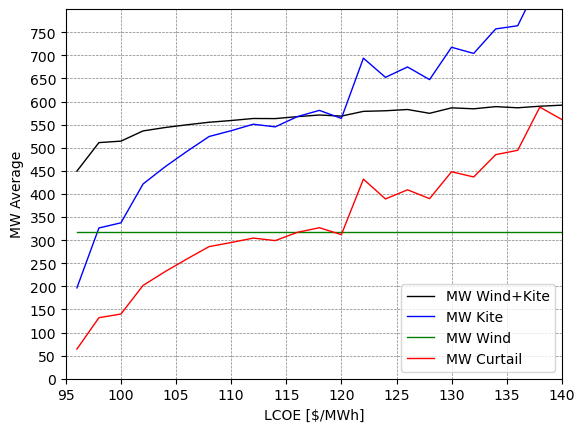

In [30]:
plt.plot( Save_LCOE_Achieved[:-1],SaveTotalMWAvg[:-1], c='k',linestyle='-',linewidth=1, label="MW Wind+Kite")
plt.plot(Save_LCOE_Achieved[:-1], MWKite, c='b',linestyle='-',linewidth=1, label="MW Kite")
plt.plot(Save_LCOE_Achieved[:-1],MWWind, c='g',linestyle='-',linewidth=1, label="MW Wind")
plt.plot(Save_LCOE_Achieved[:-1],MWCurtail, c='r',linestyle='-',linewidth=1, label="MW Curtail")

plt.ylabel('MW Average')
plt.xlabel('LCOE [$/MWh]')
plt.yticks(np.arange(0, 800, step=50))
plt.ylim(top=800)
plt.ylim(bottom=0)
plt.xlim(right=140)
plt.xlim(left=95)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right')
plt.show()
#plt.savefig('EfficientFrontier', dpi=700)
#plt.close()  

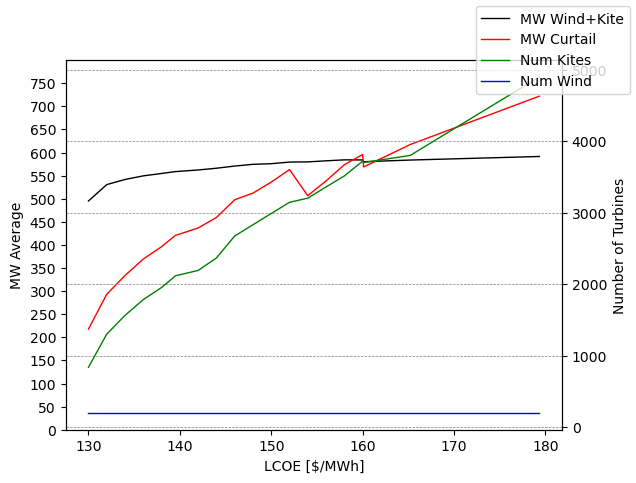

In [103]:
fig, ax1 = plt.subplots()

ax1.plot(Save_LCOE_Achieved[:-1],SaveTotalMWAvg[:-1], c='k',linestyle='-',linewidth=1, label="MW Wind+Kite")
ax1.plot(Save_LCOE_Achieved[:-1],MWCurtail, c='r',linestyle='-',linewidth=1, label="MW Curtail")

plt.yticks(np.arange(0, 800, step=50))
plt.ylim(top=800)
plt.ylim(bottom=0)
# plt.xlim(left=130,right=180)
plt.ylabel('MW Average')
plt.xlabel('LCOE [$/MWh]')
ax2 = ax1.twinx() 
ax2.plot(Save_LCOE_Achieved[:-1],NumKiteUsed, c='g',linestyle='-',linewidth=1, label="Num Kites")
ax2.plot(Save_LCOE_Achieved[:-1], NumWindTurbinesUsed, c='b',linestyle='-',linewidth=1, label="Num Wind")
ax2.set_ylabel('Number of Turbines') 


plt.grid(color='gray', linestyle='--', linewidth=0.5)
fig.legend()
plt.show()
#plt.savefig('EfficientFrontier', dpi=700)
#plt.close()  